## Homework 5 - CS 559
Matt Kearney -
Prof. Insuk Jang - 
Fundamentals of ML - 
30.3.24

In [1105]:
import pandas as pd
import numpy as np

test = pd.read_csv('kernel_ridge_test.csv') #removed comma at beginning -> "   Unnamed: 0"
train = pd.read_csv('kernel_ridge_train.csv')  # ^^

### EDA

In [1106]:
print(test.head(5))

rows_test, cols_test = test.shape
print(f"\nTest shape:\n\tRows: {rows_test}\n\tColumns: {cols_test}")

test.describe()

          x1   x2            x3    Y
0 -12.566371  5.0  2.449294e-15 -2.0
1  -6.283185  2.0  4.898587e-16 -1.0
2   0.000000  1.0  0.000000e+00  0.0
3   6.283185  2.0 -4.898587e-16  1.0
4  12.566371  5.0 -2.449294e-15  2.0

Test shape:
	Rows: 5
	Columns: 4


,x1,x2,x3,Y
count,5.000000,5.000000,5.000000e+00,5.000000
mean,0.000000,3.000000,0.000000e+00,0.000000
std,9.934588,1.870829,1.766211e-15,1.581139
min,-12.566371,1.000000,-2.449294e-15,-2.000000
25%,-6.283185,2.000000,-4.898587e-16,-1.000000
50%,0.000000,2.000000,0.000000e+00,0.000000
75%,6.283185,5.000000,4.898587e-16,1.000000
max,12.566371,5.000000,2.449294e-15,2.000000


In [1107]:
print(train.head(5))
print("\n-------------[obs 5 - obs 44]-------------\n")
print(train.tail(5))

rows_train, cols_train = train.shape
print(f"\nTest shape:\n\tRows: {rows_train}\n\tColumns: {cols_train}")

train.describe()

          x1        x2        x3         Y
0 -12.566371  3.617242  0.204829 -2.000000
1 -12.053458  4.319111  2.582332 -1.918367
2 -11.540544  1.778165  2.468020 -1.836735
3 -11.027631  0.374609  2.057867 -1.755102
4 -10.514718 -1.089312  3.089581 -1.673469

-------------[obs 5 - obs 44]-------------

           x1        x2        x3         Y
45  10.514718 -1.358345 -3.751502  1.673469
46  11.027631  0.323126 -5.663733  1.755102
47  11.540544  4.588643 -6.308534  1.836735
48  12.053458  4.763386 -1.897627  1.918367
49  12.566371  8.524086  0.919631  2.000000

Test shape:
	Rows: 50
	Columns: 4


,x1,x2,x3,Y
count,5.000000e+01,50.000000,50.000000,5.000000e+01
mean,-9.237056e-16,0.676566,0.397804,-1.243450e-16
std,7.476929e+00,2.501394,2.211010,1.189990e+00
min,-1.256637e+01,-6.409929,-6.308534,-2.000000e+00
25%,-6.283185e+00,-0.903665,-0.773674,-1.000000e+00
50%,-8.881784e-16,0.506599,0.669575,0.000000e+00
75%,6.283185e+00,1.737709,1.985352,1.000000e+00
max,1.256637e+01,8.524086,5.311137,2.000000e+00


X1 ~ Uniform(-12.56, 12.56) <br>
X2 ~ about Normal(mean = 0.67, std = 2.5) <br>
X3 ~ about Normal(mean = 0.40, std = 2.2) <br>
Y  ~ Uniform(-2.0, 2.0) 

In [1108]:
test.isnull().sum()

x1    0
x2    0
x3    0
Y     0
dtype: int64

In [1109]:
train.isnull().sum()

x1    0
x2    0
x3    0
Y     0
dtype: int64

### Visualization

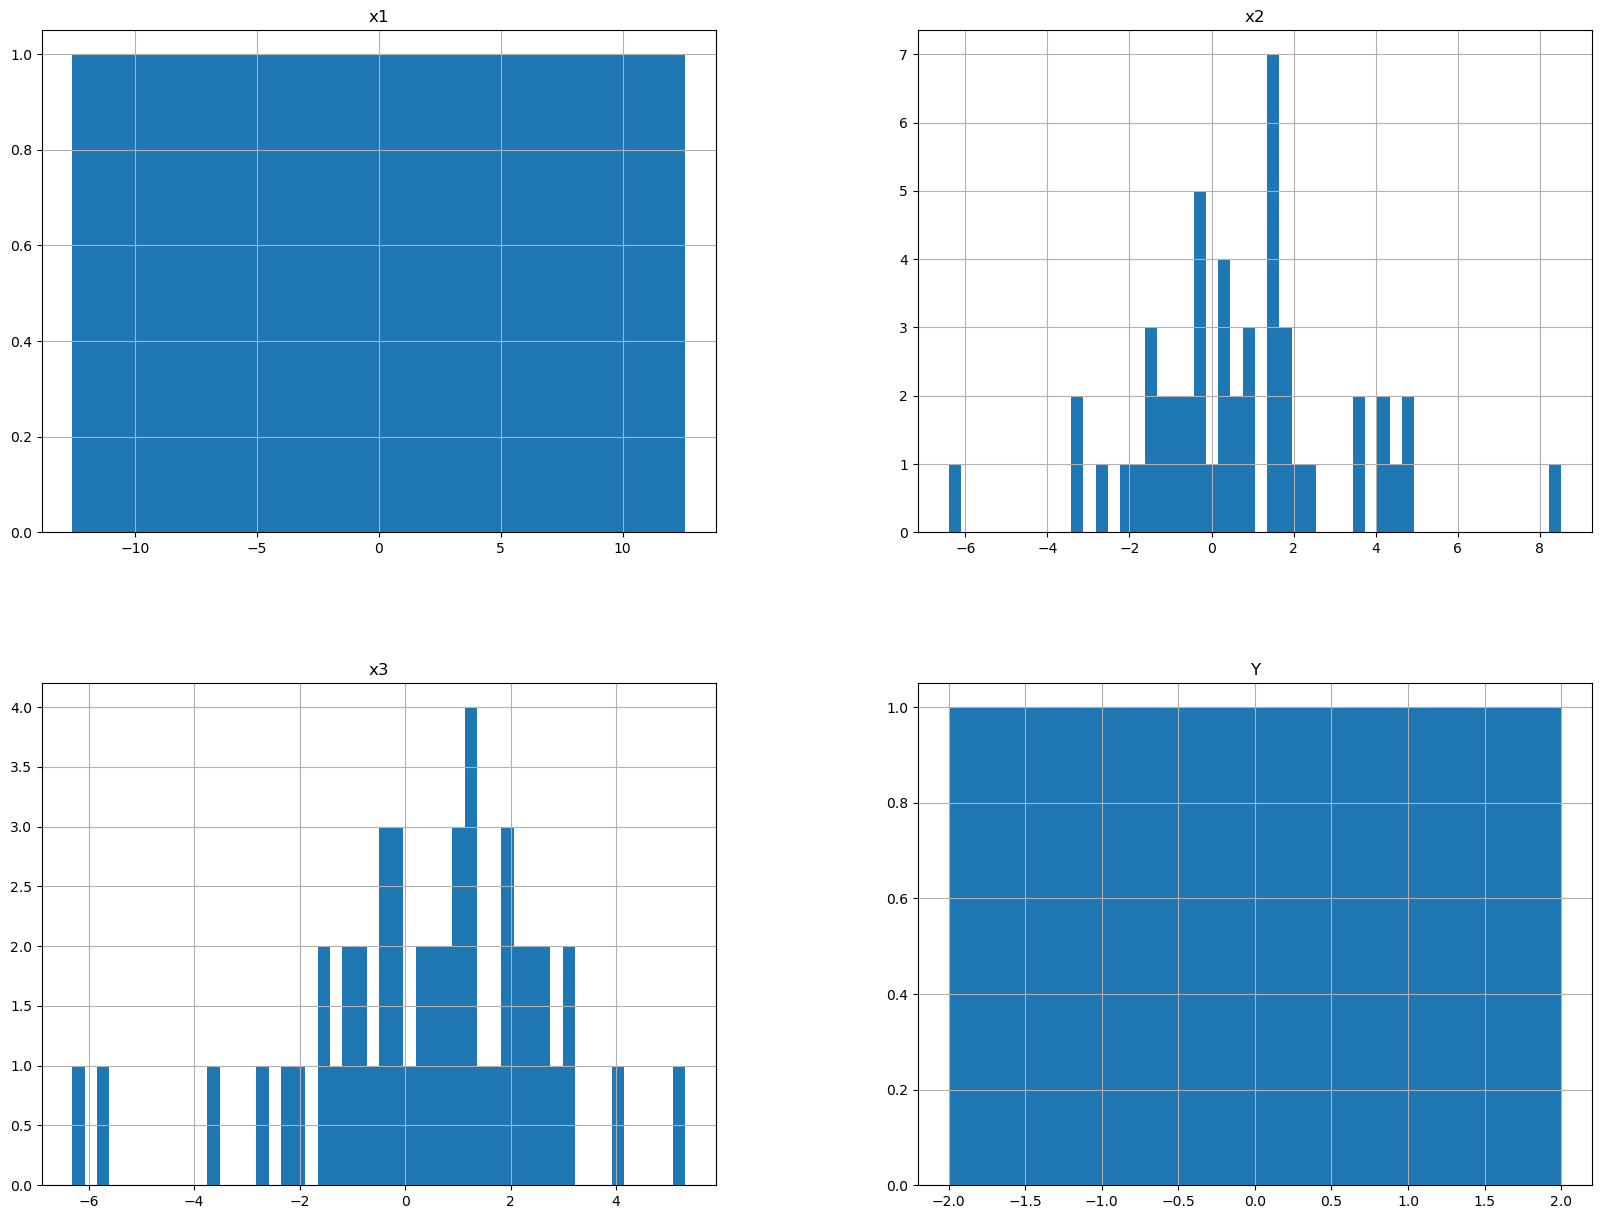

In [1110]:
import matplotlib.pyplot as plt  ## matplot not allowed, comment out
train.hist(bins=50, figsize=(20,15))
plt.show()

Note: x1 and Y appear uniformly distributed, however x2 and x3 show strong shape to a Gaussian distribution save outliers. We will want to perform kstests to check this claim. 

In [1111]:
corr_matrix = train[train.columns.tolist()].corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,x1,x2,x3,Y
x1,1.000000,0.045623,-0.285750,1.000000
x2,0.045623,1.000000,-0.119596,0.045623
x3,-0.285750,-0.119596,1.000000,-0.285750
Y,1.000000,0.045623,-0.285750,1.000000


In [1112]:
corr_matrix['Y'].sort_values(ascending=False)

Y     1.000000
x1    1.000000
x2    0.045623
x3   -0.285750
Name: Y, dtype: float64

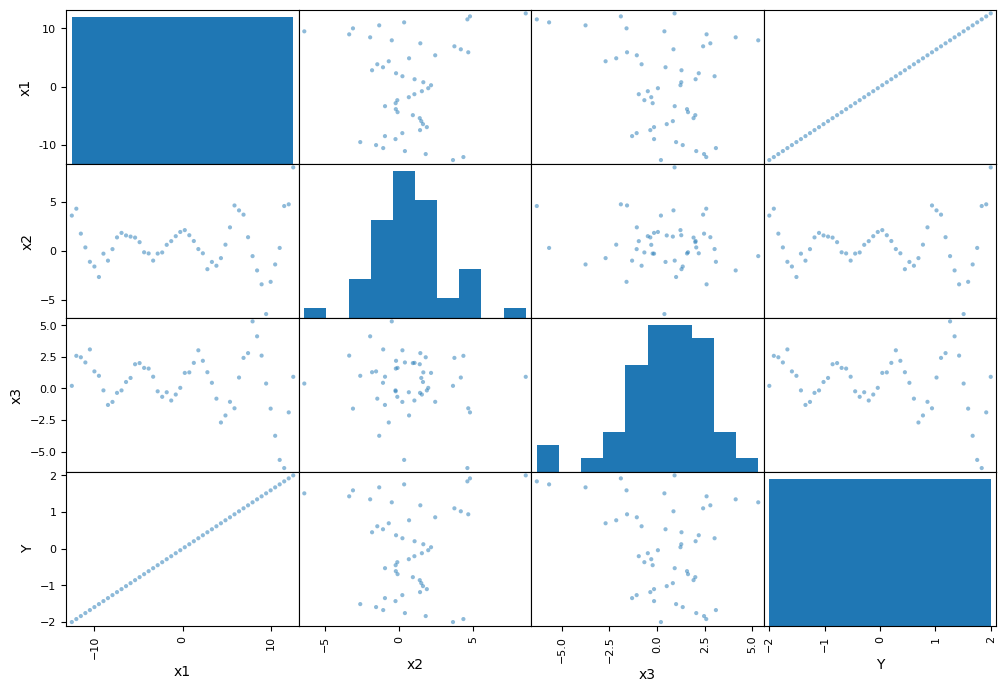

In [1113]:
from pandas.plotting import scatter_matrix

scatter_matrix(train[train.columns.tolist()], figsize=(12,8))
plt.show()

### Normalize the data

In [1114]:
x1_min = train['x1'].min()
x1_max = train['x1'].max()
x1_norm = (train['x1'] - x1_min ) / (x1_max -x1_min)
train['x1'] = x1_norm

In [1115]:
x2_min = train['x2'].min()
x2_max = train['x2'].max()
x2_norm = (train['x2'] - x2_min ) / (x2_max -x2_min)
train['x2'] = x2_norm

In [1116]:
x3_min = train['x3'].min()
x3_max = train['x3'].max()
x3_norm = (train['x3'] - x3_min ) / (x3_max -x3_min)
train['x3'] = x3_norm

In [1117]:
y_min = train['Y'].min()
y_max = train['Y'].max()
y_norm = (train['Y'] - y_min ) / (y_max -y_min)
train['Y'] = y_norm

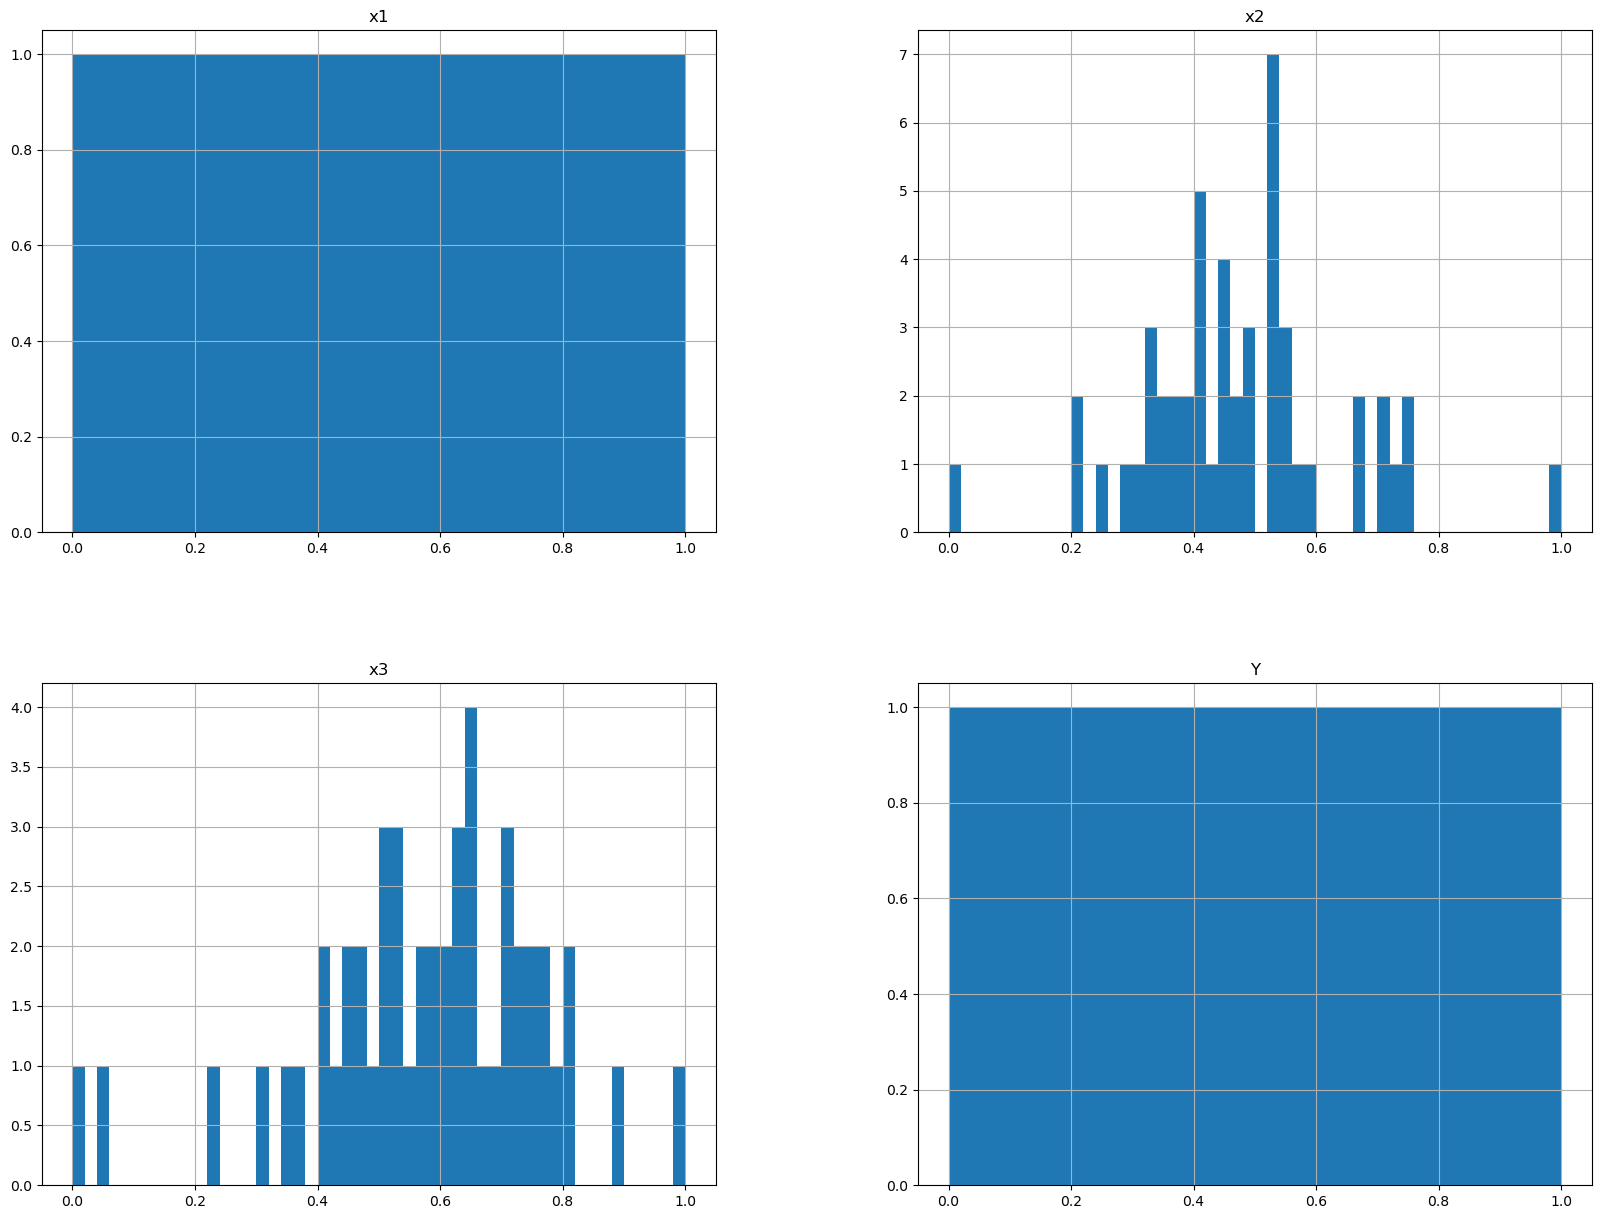

In [1118]:
train.hist(bins=50, figsize=(20,15))
plt.show()

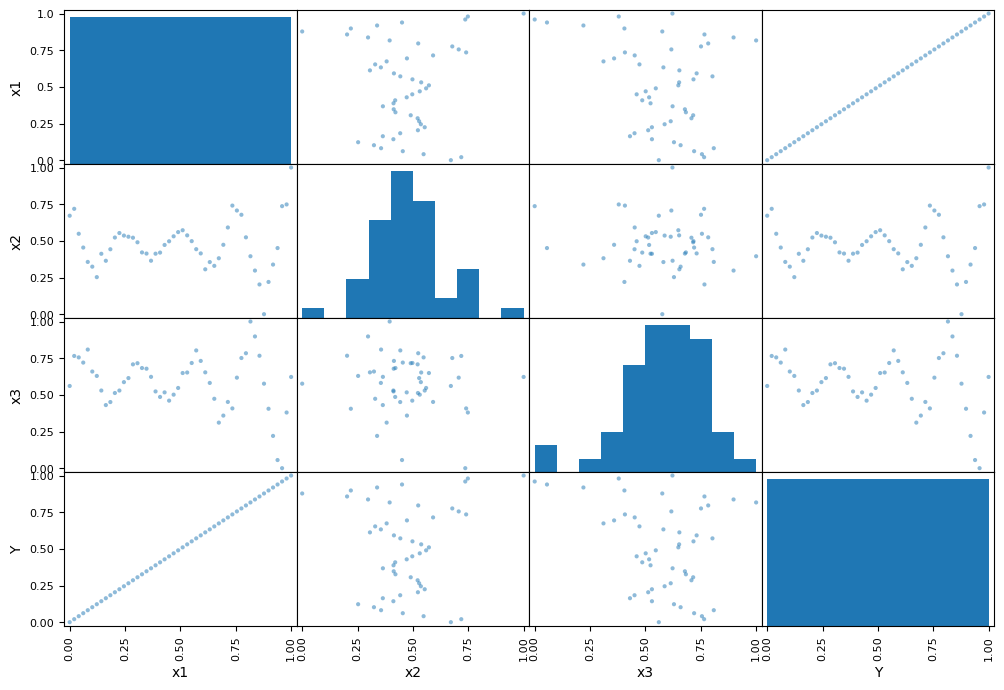

In [1119]:
scatter_matrix(train[train.columns.tolist()], figsize=(12,8))
plt.show()

Underlying data did not change, but now are related in the same range and are more ready for best learning conditions.

In [1120]:
X = pd.DataFrame()
X['x1'], X['x2'], X['x3'] = train['x1'], train['x2'], train['x3']

# G = np.dot(X, X.T)
# G.shape # confirm G is NxN (50x50)

"""
we will also want to confirm that G is positive semi-definite
"""
x1 = X['x1'].tolist()
x2 = X['x2'].tolist()
x3 = X['x3'].tolist()


In [1121]:
# inner product, kernel function
def phi_p(X1,X2,k):
    return (np.dot(X1,X2))**k

def kernel_matrix(X, l, k):
    N = len(X)
    K = np.zeros((N,N)) #make empty K
    for i in range(N):
        for j in range(N):
            inner = phi_p(X[i].T,X[j].T,k)
            # print(f"i: {i}\tj: {j}\tres: {inner}")
            K[i][j] = inner
            if j == i:
                K[i][j] += l 
    return K 



In [1122]:
a = np.array([x1, x2, x3])
l = 0 # for linear regression
gram = 1 #k=1

In [1123]:
kt = kernel_matrix(a.T,l,gram) #note: transpose a to achieve kernel matrix...
# print(a) 
print(kt.shape) #our kernel matrix is 50x50 
kt



(50, 50)


array([[0.76503268, 0.91128207, 0.79152687, ..., 0.49449465, 0.71513829,
        1.0201267 ],
       [0.91128207, 1.10202207, 0.97267399, ..., 0.54868281, 0.84796427,
        1.2148132 ],
       [0.79152687, 0.97267399, 0.87278846, ..., 0.44295003, 0.73692263,
        1.05895677],
       ...,
       [0.49449465, 0.54868281, 0.44295003, ..., 1.46243307, 1.49062579,
        1.69566161],
       [0.71513829, 0.84796427, 0.73692263, ..., 1.49062579, 1.66347327,
        1.96391008],
       [1.0201267 , 1.2148132 , 1.05895677, ..., 1.69566161, 1.96391008,
        2.38696211]])

In [1124]:
def compute_w(y, K):
    invK = np.linalg.inv(K)
    # print(y.shape, invK.shape)
    a = np.matmul(y, invK)
    return a

y = np.array(train['Y'])

w = compute_w(y, kt)
# print(a.shape)
w

array([-1.25      , -0.25      , -0.875     , -0.84375   , -0.125     ,
        1.75      ,  3.25      ,  0.625     ,  0.        , -5.        ,
       -2.4296875 ,  4.1875    ,  1.53125   ,  1.359375  ,  0.5       ,
       -1.75      , -0.25      ,  3.1875    , -3.90625   ,  2.5625    ,
        5.25      , -2.5625    ,  1.8125    , -0.5625    ,  2.375     ,
       -0.3125    , -0.875     , -3.5       ,  0.25      , -1.25      ,
       -2.06640625, -1.25      ,  3.78125   , -1.75      ,  3.375     ,
       -4.625     , -1.5625    ,  1.        ,  3.1875    ,  0.5       ,
       -3.75      , -0.75      , -0.9375    ,  0.5703125 , -2.875     ,
        0.5625    , -1.        , -5.1875    , -0.375     ,  0.        ])

In [1125]:
def train_prediction(w, x, X, k):
    N = len(X)
    
    y_pred = []
    for i in range(len(x)):
        test = x[i]
        s = 0.0
        for j in range(N):
            train = X[j]
            kT = phi_p(test, train, k)
            s += w[j]*kT
        y_pred.append(s)
    return y_pred
k=1

y_pred = train_prediction(w, a.T, a.T, k)
print(y_pred)
# train['Y']

[-6.436032139446553, -7.804354274756944, -6.952057298664196, -6.456110195059641, -6.4563488997429195, -5.855591125296535, -5.518888286658994, -6.293510746214994, -5.810880214409265, -6.598453699057292, -7.5676256923093295, -8.048760095057904, -8.407517747875643, -8.699924660726996, -9.274744820860484, -9.341767130765646, -9.00756871292248, -9.164987937343493, -8.858290962001185, -8.956275615793496, -9.068582512590758, -9.739029547881962, -9.879359580478255, -10.47986999777696, -11.069951441193169, -11.798083979396337, -11.824977187069964, -12.080349294278212, -12.330441715905804, -12.078776550554561, -11.316455243987741, -11.538054069055589, -11.151587616305903, -11.008153481053128, -11.990886010541482, -13.322920467971983, -14.26973208595287, -15.169113112481856, -15.77861906353727, -15.203246317663686, -15.550454695006486, -14.753134734389945, -13.849184549896403, -12.041142802507089, -12.883667852710522, -13.051206325827774, -13.269115849808214, -14.997141983139864, -16.885212495582

In [1126]:
#calculate MSE... case k = 1
def MSE(y, y_hat, init):
    if len(y) == 0:
        return init
    else: 
        return MSE(y[1:], y_hat[1:], init+(y[0]-y_hat[0])**2)
    
MSE(y, y_pred, 0)

7004.329042750214

In [1127]:
k_list = range(2, 12)
d = k_list[0]
a = np.array([x1, x2, x3])
y = np.array(train['Y'])
l = 0 # for linear regression
MSEs = []


for i in k_list:
    k = i
    kt = kernel_matrix(a.T,l,k)
    w = compute_w(y, kt)
    y_pred = train_prediction(w, a.T, a.T, k)
    mse= MSE(y, y_pred, 0)
    MSEs.append(mse)
    print(f"k: {i}\tMSE: {mse}")

print(min(MSEs))
MSEs

k: 2	MSE: 122361.4105199697
k: 3	MSE: 2950205.5586336097
k: 4	MSE: 306402199067.8519
k: 5	MSE: 27193079250234.492
k: 6	MSE: 20943980674690.867
k: 7	MSE: 18492706803253.01
k: 8	MSE: 37009286275052.42
k: 9	MSE: 6512905368009.98
k: 10	MSE: 20481584558.52347
k: 11	MSE: 13598214873.42251
122361.4105199697


[122361.4105199697,
 2950205.5586336097,
 306402199067.8519,
 27193079250234.492,
 20943980674690.867,
 18492706803253.01,
 37009286275052.42,
 6512905368009.98,
 20481584558.52347,
 13598214873.42251]

The best model according to the presented MSEs would be upon k = 2 (save k = 1), however it is important to notice that our MSE reaches a peak at k = 7 after which it will drop by orders of magnitude. I am interested as to whether it will continue to decrease past k = 11 and why our MSE is so high. 

In [1128]:
#b.) 
e=2.71828

def rbf(l, x, z): # x and z are the same thing...
    return e**(-l*(np.linalg.norm(x - z))**2)


# for i in len(a):
#     for j in len(a):
#     print(rbf(l, a[i], a))


In [1129]:
def kernel_matrix_rbf(X, l, k):
    N = len(X)
    K = np.zeros((N,N)) #make empty K
    for i in range(N):
        for j in range(N):
            rbfv = rbf(l, X[i].T,X[j].T)
            # print(f"i: {i}\tj: {j}\tres: {rbfv}") #debugging...
            K[i][j] = rbfv
            if j == i:
                K[i][j] += l 
    return K 


In [1130]:
a = np.array([x1, x2, x3])
y = np.array(train['Y'])
l=1.5
kt = kernel_matrix_rbf(a.T,l,gram) #note: transpose a to achieve kernel matrix...
print(kt.shape) # Kernel matrix is N x N


(50, 50)


In [1131]:

a = np.array([x1, x2, x3])
y = np.array(train['Y'])
l_list= [0.001, 0.0055, 0.01, 0.055, 0.1, 0.55, 1, 5.5, 10, 55.5]
MSEs = []


for l in l_list:
    kt = kernel_matrix_rbf(a.T,l,k)
    w = compute_w(y, kt)
    y_pred = train_prediction(w, a.T, a.T, k)
    mse= MSE(y, y_pred, 0)
    MSEs.append(mse)
    print(f"k: {l}\tMSE: {mse}")

# print(min(MSEs))
MSEs

k: 0.001	MSE: 1178386042334.9949
k: 0.0055	MSE: 40219512389.693436
k: 0.01	MSE: 12553955644.398605
k: 0.055	MSE: 551974281.8857212
k: 0.1	MSE: 213048630.54907537
k: 0.55	MSE: 29273554.62098842
k: 1	MSE: 18684640.01739375
k: 5.5	MSE: 5669656.322908576
k: 10	MSE: 2801594.5868248986
k: 55.5	MSE: 135490.61652983868


[1178386042334.9949,
 40219512389.693436,
 12553955644.398605,
 551974281.8857212,
 213048630.54907537,
 29273554.62098842,
 18684640.01739375,
 5669656.322908576,
 2801594.5868248986,
 135490.61652983868]

The best model obtained from using the Kernel Matrix obtained through RBF was in the last iteration with the highest lambda @ l = 55.5. It is likely true that even greater lambda results may product best outcomes. 

In [1134]:
d_list = range(2,12) # vals from b)
l_list = [0.001, 0.0055, 0.01, 0.055, 0.1, 0.55, 1, 5.5, 10, 55.5] # vals from c)
d, l = d_list[0], l_list[0]

def kernel_matrix_comb(X, l, k):
    N = len(X)
    K = np.zeros((N,N)) #make empty K
    for i in range(N):
        for j in range(N):
            inner = phi_p(X[i].T,X[j].T,k)*rbf(l, X[i].T, X[j].T)
            # print(f"i: {i}\tj: {j}\tres: {inner}")
            K[i][j] = inner
            if j == i:
                K[i][j] += l 
    return K     

kt = kernel_matrix_comb(a.T,l,gram)
kt
# kt.shape

TypeError: 'float' object is not callable

In [1135]:

MSEs = []
for poly in d_list:
    for rbf in l_list: 
        kt = kernel_matrix_comb(a.T,rbf,poly)
        w = compute_w(y, kt)
        y_pred = train_prediction(w, a.T, a.T, poly)
        mse= MSE(y, y_pred, 0)
        MSEs.append(mse)
        print(f"degree: {poly}\tgamma: {rbf}\tmse: {mse}")

TypeError: 'float' object is not callable